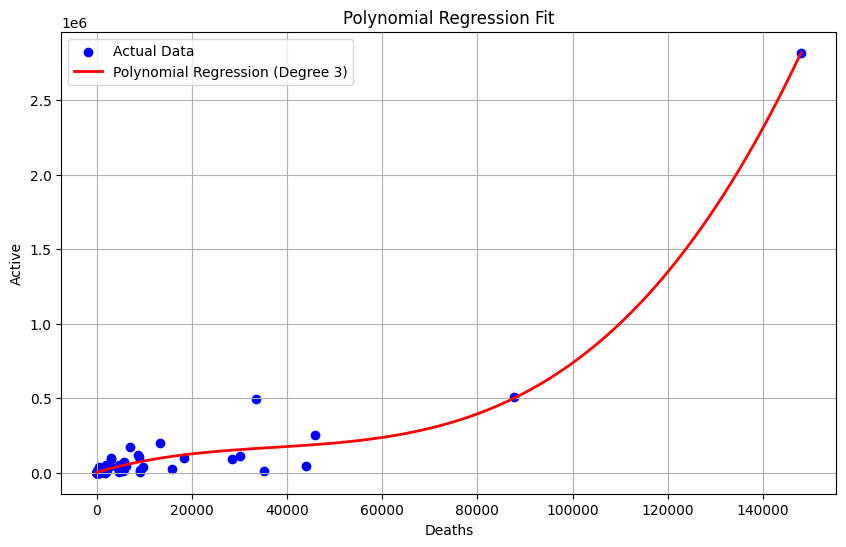

Best Polynomial Degree: 3
Best R^2 Score: 0.6478


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

v=input("Select the independent Variable")
w=input("Select the dependent variable")

file_path = "DS (1).csv"  
df = pd.read_csv(file_path)

X = df[[v]].values
y = df[w].values

best_degree = 3
best_score = float('-inf')
degrees = range(1, 10) 

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    scores = cross_val_score(model, X, y, cv=5, scoring="r2")
    avg_score = np.mean(scores)
    
    if avg_score > best_score:
        best_score = avg_score
        best_degree = d

final_model = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
final_model.fit(X, y)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = final_model.predict(X_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_pred, color='red', linewidth=2, label=f'Polynomial Regression (Degree {best_degree})')
plt.xlabel(v)
plt.ylabel(w)
plt.legend()
plt.title('Polynomial Regression Fit')
plt.grid()
plt.show()

print(f'Best Polynomial Degree: {best_degree}')
print(f'Best R^2 Score: {best_score:.4f}')


Import Required Libraries

Load the Dataset

Select Independent and Dependent Variables

Find the Best Polynomial Degree Using Cross-Validation


Uses cross-validation (cv=5) to evaluate models.

Selects the degree with the highest average R² score.

Train the Final Model

Builds a polynomial regression model using the best degree.

Generate Predictions for Plotting

